<a href="https://colab.research.google.com/github/EronDS/Neural-Networks/blob/main/CNNs/Images/CladeClassification(Wasps%26Bees)/BeeAndWasps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Em minha rápida inspeção do conjunto de dados, encontrei aracnídeos (membro do gênero Argiope) e outros insetos que pertencem à família Syrphidae incluídos na classificação de abelhas e vespas. Embora esses animais possam mimicar (principalmente Syrphidae) abelhas e vespas, os mesmos não pertencem ao clado em questão.

Além disso, foi possível encontrar, rotulagem errônea de abelhas e vespas. É claro que o trabalho de segregar ambos grupos é um alvo difícil até mesmo para humanos não profissionais, e através deste notebook foi possível notar que problemas semelhantes surgiram na visão computacional. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
import seaborn as sns 
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, Activation
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.optimizers import Adam,RMSprop
from keras.models import Model,Sequential

In [2]:
BEE = [] 
label = [] 
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/bee/'):
  BEE.append(i)
  label.append('Bee')
  
WASP = [] 
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/wasp/'):
  WASP.append(i)
  label.append('Wasp')

OTHER = [] 

for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/other_insect/'):
  OTHER.append(i)
  label.append('Other')


In [3]:
bee = [] 
label = [] 
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/bee/'):
  bee.append('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/bee/{}'.format(i))
  label.append('Bee')

wasp = [] 
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/wasp/'):
  wasp.append('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/wasp/{}'.format(i))
  label.append('Wasp')

other = [] 

for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/other_insect/'):
  other.append('/content/drive/MyDrive/Colab Notebooks/Polen/kaggle_bee_vs_wasp/other_insect/{}'.format(i))
  label.append('Other')


In [4]:
df = pd.DataFrame()
df['Filename'] = BEE + WASP + OTHER
df['label'] = label
df

Filename  label
0     40465916291_d4ee8d42f2_n.jpg    Bee
1     44575401621_9951d5dc78_m.jpg    Bee
2      3815566433_6bcf000d76_m.jpg    Bee
3     43064260222_6b008e5c53_n.jpg    Bee
4     44596343691_6c520f160c_w.jpg    Bee
...                            ...    ...
6778  26728885658_63132399ab_n.jpg  Other
6779   1905647384_8f445c3f6f_w.jpg  Other
6780  17071999455_da6ce7613f_n.jpg  Other
6781    245680745_6bf7b0bd66_n.jpg  Other
6782    146459034_5ee80ae130_m.jpg  Other

[6783 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


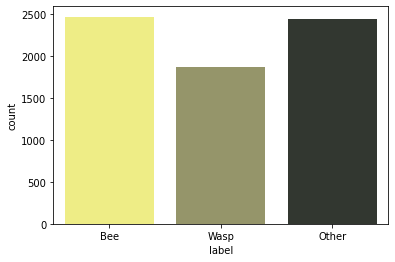

In [5]:
k = ['#FFFE75' , '#9C9C63' , '#31382F']

sns.countplot(df['label'], palette = k)

In [6]:
plt.title

<function matplotlib.pyplot.title>

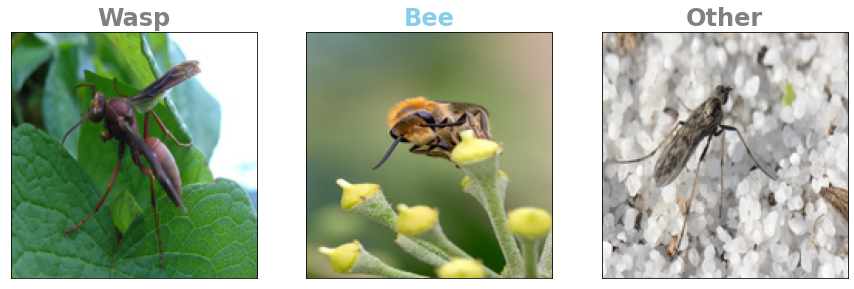

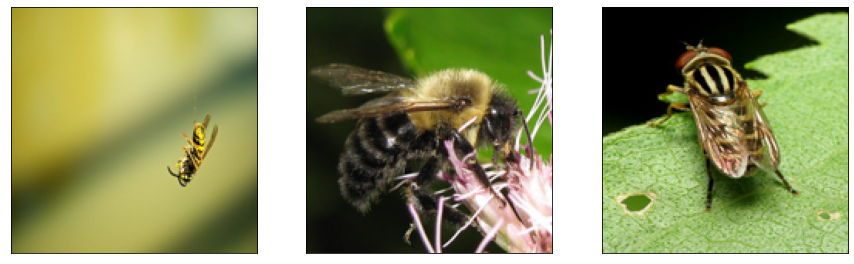

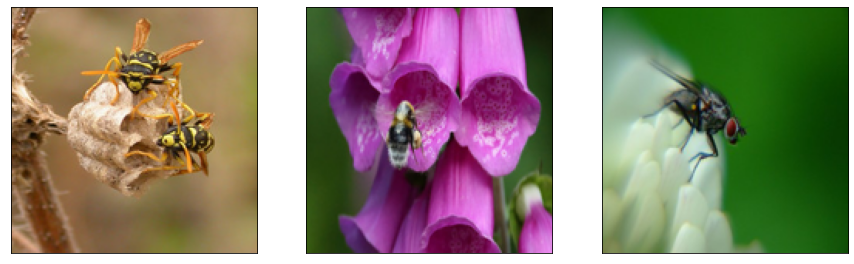

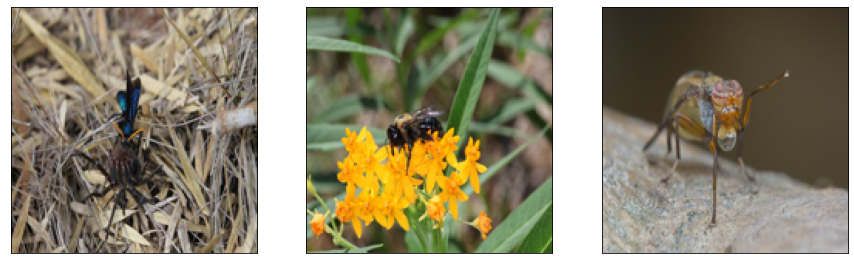

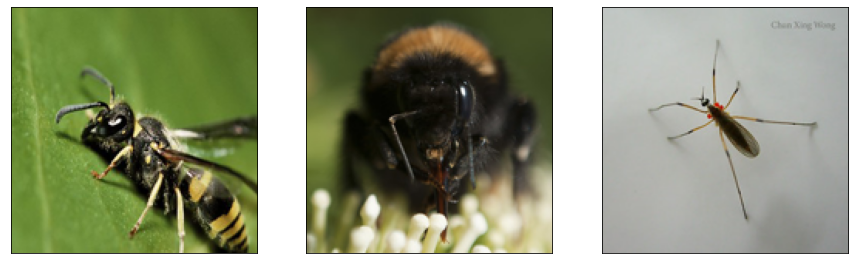

In [7]:
u = 0

def plot_images(wasp,bee,other):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.imshow(Image.open(wasp).resize((160,160)))
    plt.xticks([])
    plt.yticks([])
    if u == 0:
      plt.title('Wasp', weight = 'bold' , fontsize = 24, color = 'grey')
    plt.subplot(1,3,2)
    plt.imshow(Image.open(bee).resize((160,160)))
    if u == 0 :
      plt.title('Bee' , weight = 'bold' , fontsize = 24 , color = 'skyblue' )
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,3,3)
    if u == 0 :
      plt.title('Other', weight = 'bold' , fontsize = 24 ,color = 'grey')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Image.open(other).resize((160,160)))
   
    plt.show()

for i in range(1,6):
  plot_images(wasp[i] , bee[i] , other[i])
  u+=1



In [8]:
df

Filename  label
0     40465916291_d4ee8d42f2_n.jpg    Bee
1     44575401621_9951d5dc78_m.jpg    Bee
2      3815566433_6bcf000d76_m.jpg    Bee
3     43064260222_6b008e5c53_n.jpg    Bee
4     44596343691_6c520f160c_w.jpg    Bee
...                            ...    ...
6778  26728885658_63132399ab_n.jpg  Other
6779   1905647384_8f445c3f6f_w.jpg  Other
6780  17071999455_da6ce7613f_n.jpg  Other
6781    245680745_6bf7b0bd66_n.jpg  Other
6782    146459034_5ee80ae130_m.jpg  Other

[6783 rows x 2 columns]

In [9]:
datagen = ImageDataGenerator(rescale = 1./25)
train_imgs = datagen.flow_from_dataframe(df, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'Filename', y_col = 'label', target_size = (120,120))

Found 6783 validated image filenames belonging to 3 classes.


In [10]:
train_imgs.class_indices

{'Bee': 0, 'Other': 1, 'Wasp': 2}

In [11]:
model = Sequential()
model.add(Conv2D(64,2, strides = 2, padding = 'same', 
                 input_shape = (120,120,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, 2 , strides = 2, padding  = 'same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(.33))
model.add(Dense(3, activation= 'softmax'))

In [12]:
steps = train_imgs.n // train_imgs.batch_size
model.compile(RMSprop(), loss = 'categorical_crossentropy',metrics = ['acc'])

In [13]:
model.fit_generator(train_imgs,steps_per_epoch=steps, epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
211/211 [==============================] - 34s 90ms/step - loss: 3.6263 - acc: 0.5385
Epoch 2/10
211/211 [==============================] - 19s 90ms/step - loss: 0.8262 - acc: 0.6562
Epoch 3/10
211/211 [==============================] - 19s 89ms/step - loss: 0.7120 - acc: 0.7274
Epoch 4/10
211/211 [==============================] - 19s 88ms/step - loss: 0.5866 - acc: 0.7791
Epoch 5/10
211/211 [==============================] - 19s 90ms/step - loss: 0.5119 - acc: 0.8175
Epoch 6/10
211/211 [==============================] - 19s 90ms/step - loss: 0.4374 - acc: 0.8456
Epoch 7/10
211/211 [==============================] - 19s 89ms/step - loss: 0.3474 - acc: 0.8755
Epoch 8/10
211/211 [==============================] - 19s 89ms/step - loss: 0.3007 - acc: 0.8953
Epoch 9/10
211/211 [==============================] - 19s 90ms/step - loss: 0.2651 - acc: 0.9083
Epoch 10/10
211/211 [==============================] - 19s 90ms/step - loss: 0.2158 - acc: 0.9308


###Avoiding Overfitting

In [14]:
x_train, x_test , y_train , y_test = train_test_split(df['Filename'] , df['label'] , shuffle = True, test_size = .25)

In [15]:
train = pd.DataFrame() 
train['filename'] = x_train 
train['label'] = y_train 
train

filename  label
3815   2486467760_b2ec4299fc_m.jpg   Wasp
1433  26234083812_5c69c4fc82_n.jpg    Bee
4370  41715571700_1a9f4d13da_n.jpg  Other
3502    137125129_53803e64b8_w.jpg   Wasp
3920   3315933738_314857d882_n.jpg   Wasp
...                            ...    ...
3091   3623637987_e024248842_n.jpg   Wasp
4261   2216422460_162af7735e_m.jpg   Wasp
260    4143240035_1e1981d535_n.jpg    Bee
4474  41729552251_5a51952771_n.jpg  Other
3851   2777404095_77ca6419f1_n.jpg   Wasp

[5087 rows x 2 columns]

In [16]:
test = pd.DataFrame()
test['filename'] = x_test 
test['label'] = y_test

In [17]:
x_test,x_val,y_test,y_val = train_test_split(test['filename'] , test['label'], test_size = .5)

In [18]:
test = pd.DataFrame()
test['filename'] = x_test
test['label'] = y_test
test

filename  label
160    4823956217_8a006a1ccb_m.jpg    Bee
1239  30114057788_280a48c9f3_w.jpg    Bee
569    5835021004_2da789c190_n.jpg    Bee
1964   5606099976_4e6bdf8a90_n.jpg    Bee
3239   5839852249_c9ecc0f96d_n.jpg   Wasp
...                            ...    ...
6178  36803295614_ee94c12577_n.jpg  Other
5102   8683167717_197d07bfba_m.jpg  Other
5139   6942269654_d000e87ce9_m.jpg  Other
1640   3734864865_48d1a97cb3_n.jpg    Bee
702    7005643908_30c0260242_m.jpg    Bee

[848 rows x 2 columns]

In [19]:
val = pd.DataFrame()
val['filename'] = x_val
val['label'] = y_val 
val

filename  label
1199    193717520_96e3f2c0c0_m.jpg    Bee
1515  31509167855_34ea7da770_n.jpg    Bee
2026  10741832906_8cfa402d7b_n.jpg    Bee
937    9593842559_bb3e0edd7d_w.jpg    Bee
3642   1627322443_b9a5f4f3e0_n.jpg   Wasp
...                            ...    ...
3582  15096370682_7c3a1550dd_n.jpg   Wasp
437    5972331416_d24479a4b0_n.jpg    Bee
5127   7942052190_29579843d1_n.jpg  Other
3022  40389318053_d6cbf0960f_w.jpg   Wasp
6128  27466883587_0ea8a0113f_n.jpg  Other

[848 rows x 2 columns]

In [20]:
datagen = ImageDataGenerator(rescale = 1./255)
train_data = datagen.flow_from_dataframe(train, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'filename', y_col = 'label', target_size = (120,120))
test_data = datagen.flow_from_dataframe(test, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'filename', y_col = 'label', target_size = (120,120))
val_data = datagen.flow_from_dataframe(val, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'filename', y_col = 'label', target_size = (120,120))

Found 5087 validated image filenames belonging to 3 classes.
Found 848 validated image filenames belonging to 3 classes.
Found 848 validated image filenames belonging to 3 classes.


In [21]:
model2 = Sequential()
model2.add(Conv2D(64,2, strides = 2, padding = 'same', 
                 input_shape = (120,120,3)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, 2 , strides = 1, padding  = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Conv2D(64, 2 , strides = 1, padding  = 'same'))
model2.add(Activation('relu'))
model2.add(Dropout(.25))



model2.add(Flatten())
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dropout(.33))
model2.add(Dense(3, activation= 'softmax'))

In [22]:
model2.compile(RMSprop(),loss = 'categorical_crossentropy', metrics = ['acc'])

In [23]:
step_train = train_data.n // train_data.batch_size
step_val = val_data.n // val_data.batch_size


history = model2.fit_generator(generator = train_data,
                    steps_per_epoch = step_train,
                    validation_data = val_data,
                    validation_steps = step_val,
                    epochs = 6)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
158/158 [==============================] - 19s 110ms/step - loss: 1.1998 - acc: 0.4706 - val_loss: 0.9468 - val_acc: 0.5637
Epoch 2/6
158/158 [==============================] - 17s 107ms/step - loss: 0.9005 - acc: 0.6247 - val_loss: 0.7536 - val_acc: 0.6719
Epoch 3/6
158/158 [==============================] - 17s 106ms/step - loss: 0.7973 - acc: 0.6734 - val_loss: 0.7804 - val_acc: 0.6587
Epoch 4/6
158/158 [==============================] - 17s 107ms/step - loss: 0.7322 - acc: 0.7095 - val_loss: 0.6879 - val_acc: 0.7043
Epoch 5/6
158/158 [==============================] - 17s 107ms/step - loss: 0.6533 - acc: 0.7469 - val_loss: 0.7278 - val_acc: 0.6947
Epoch 6/6
158/158 [==============================] - 17s 107ms/step - loss: 0.6037 - acc: 0.7620 - val_loss: 0.7665 - val_acc: 0.6959


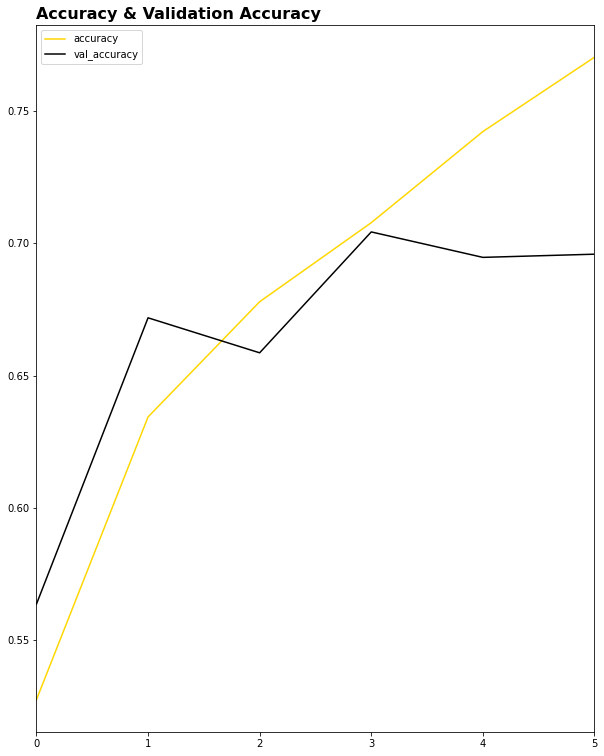

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize = (10,13))
plt.title('Accuracy & Validation Accuracy' , weight = 'bold' , fontsize = 16 , loc = 'left')
plt.plot(range(0,6), acc, label = 'accuracy' , color = 'gold')
plt.plot(val_acc, label = 'val_accuracy', color = 'black')
plt.legend()
plt.xlim(0,5)
plt.show()


In [25]:
train_data.class_indices

{'Bee': 0, 'Other': 1, 'Wasp': 2}

In [26]:
res = model2.evaluate(test_data)
print('Acc : {} , More Info: {}'.format(res[1] , res[0]))

27/27 [==============================] - 2s 90ms/step - loss: 0.7749 - acc: 0.7005
Acc : 0.7004716992378235 , More Info: 0.7749297022819519


In [27]:
preds = model2.predict(test_data)
preds 

array([[4.09372337e-02, 8.67296517e-01, 9.17663053e-02],
       [1.31630129e-03, 9.88974094e-01, 9.70959850e-03],
       [8.68676722e-01, 1.31239712e-01, 8.35712854e-05],
       ...,
       [9.77930069e-01, 2.18054056e-02, 2.64508097e-04],
       [5.45690477e-01, 4.42716271e-01, 1.15932375e-02],
       [4.96567972e-03, 9.55303609e-01, 3.97306941e-02]], dtype=float32)

In [28]:
preds = np.argmax(preds,axis = 1)
preds

array([1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0,
       1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0,
       1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,

In [29]:
preds = model2.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


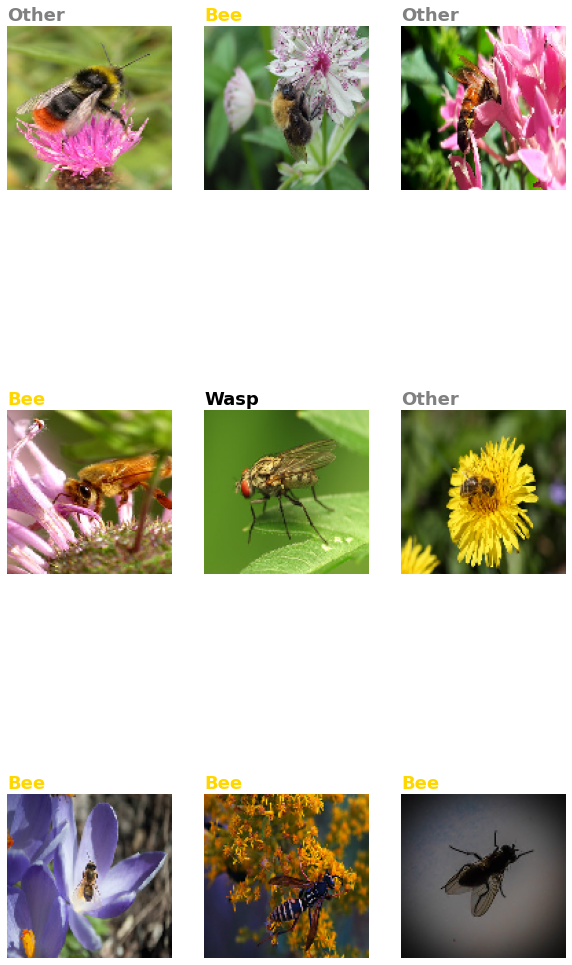

In [30]:
plt.figure(figsize=(10, 20))

for i in range(1 , 10):
    plt.subplot(3, 3, i )
    plt.imshow(test_data[0][0][i])
    if preds[i] == 0:
      plt.title('Bee' , color = 'gold' , loc = 'left', weight = 'bold' , fontsize = 18)
    if preds[i] == 1:
      plt.title('Other' , color = 'grey' , loc = 'left' , weight = 'bold' , fontsize = 18)
    if preds[i] == 2:
      plt.title('Wasp' , color = 'black' , loc = 'left' , weight = 'bold' , fontsize = 18)
    plt.axis('off')

plt.show()


###Cleaning and Trying Distinction Only Between Bees and Wasps (Avoiding Inserted noise from others insects)

In [31]:
df = pd.DataFrame()
df['filename'] = BEE + WASP 
label = [] 

for i in range(len(BEE)):
  label.append('Bee')
for i in range(len(WASP)):
  label.append('Wasp')
df['label'] = label
df

filename label
0     40465916291_d4ee8d42f2_n.jpg   Bee
1     44575401621_9951d5dc78_m.jpg   Bee
2      3815566433_6bcf000d76_m.jpg   Bee
3     43064260222_6b008e5c53_n.jpg   Bee
4     44596343691_6c520f160c_w.jpg   Bee
...                            ...   ...
4339  20040899024_863213a6bc_n.jpg  Wasp
4340   2842267489_52581e5c34_n.jpg  Wasp
4341  30493030791_9b8259536f_n.jpg  Wasp
4342   3297159811_b3f9f49c87_n.jpg  Wasp
4343     29023754_e3ecc8d46a_m.jpg  Wasp

[4344 rows x 2 columns]

In [32]:
x_train, x_test , y_train , y_test = train_test_split(df['filename'] , df['label'] , shuffle = True, test_size = .25)

In [33]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,shuffle = True , test_size = .5)


In [34]:
train = pd.DataFrame()
train['filename'] = x_train 
train['label'] = y_train 
train

filename label
1606  42342300322_f7bfb0f4e4_n.jpg   Bee
3887   2317234525_ef45574624_n.jpg  Wasp
1368  32398097536_95a8b142a6_m.jpg   Bee
3698  13305693794_7026cffefa_n.jpg  Wasp
3268   5906010353_7413cc0a44_w.jpg  Wasp
...                            ...   ...
456    6162899347_0eef95552c_n.jpg   Bee
1253  28468979718_89aa87ff34_w.jpg   Bee
2441  18586570056_2280f56eee_n.jpg   Bee
3239   5839852249_c9ecc0f96d_n.jpg  Wasp
3100   4673775523_752f570734_n.jpg  Wasp

[3258 rows x 2 columns]

In [35]:
test = pd.DataFrame()
test['filename'] = x_test 
test['label'] = y_test
test

filename label
3957   2481146655_e6a7264aec_m.jpg  Wasp
685    5646924383_39b712860c_n.jpg   Bee
163   43059905292_a6ab67fa2b_w.jpg   Bee
1843   4765140035_484f3c74fc_n.jpg   Bee
3751  15027502766_27fcc370d9_n.jpg  Wasp
...                            ...   ...
4298  16669513945_8a00349315_n.jpg  Wasp
1411   3297606793_22d2ec2962_n.jpg   Bee
2004  10130729734_f68738333e_w.jpg   Bee
4235   2789299505_d86928a1a6_n.jpg  Wasp
498    8325199738_7fafd7bb9e_n.jpg   Bee

[543 rows x 2 columns]

In [36]:
val = pd.DataFrame()
val['filename'] = x_val
val['label'] = y_val 
val

filename label
2494   3235592549_62cea451eb_n.jpg  Wasp
677    8436251079_0e580e4c6d_n.jpg   Bee
2820   4752589404_3e37db65ff_m.jpg  Wasp
3662  16179360671_979e66fa29_m.jpg  Wasp
2198  15035987788_4cafee6130_n.jpg   Bee
...                            ...   ...
3710  14858815561_4d8936871c_n.jpg  Wasp
1452  30121445178_381af118e4_m.jpg   Bee
2849    482846429_2afd5042f2_w.jpg  Wasp
4151  33100427530_8154863a95_n.jpg  Wasp
3519  13305693664_d120ff4e88_n.jpg  Wasp

[543 rows x 2 columns]

In [37]:
datagen = ImageDataGenerator(rescale = 1./255)
train_data = datagen.flow_from_dataframe(train, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'filename', y_col = 'label',class_mode = 'binary', target_size = (120,120))
test_data = datagen.flow_from_dataframe(test, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'filename', y_col = 'label',class_mode = 'binary', target_size = (120,120))
val_data = datagen.flow_from_dataframe(val, '/content/drive/MyDrive/Colab Notebooks/Polen/ALL/' ,
                            x_col = 'filename', y_col = 'label',class_mode = 'binary', target_size = (120,120))

Found 3258 validated image filenames belonging to 2 classes.
Found 543 validated image filenames belonging to 2 classes.
Found 543 validated image filenames belonging to 2 classes.


In [38]:
model3 = Sequential()
model3.add(Conv2D(64,2, padding = 'same', 
                 input_shape = (120,120,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32, 2 , strides = 2, padding  = 'same'))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Conv2D(32, 2 , strides = 2, padding  = 'same'))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Dropout(.25))



model3.add(Flatten())
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(.33))
model3.add(Dense(1, activation= 'sigmoid'))

In [39]:
model3.compile(Adam(),loss= 'binary_crossentropy', metrics = ['acc'])

In [40]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 120, 120, 64)      832       
_________________________________________________________________
activation_7 (Activation)    (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        8224      
_________________________________________________________________
activation_8 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 32)        4128      
_________________________________________________________________
activation_9 (Activation)    (None, 15, 15, 32)       

In [41]:
step_train = train_data.n // train_data.batch_size
step_val = val_data.n // val_data.batch_size

history3 = model3.fit_generator(generator = train_data,
                    steps_per_epoch = step_train,
                    validation_data = val_data,
                    validation_steps = step_val,
                    epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


101/101 [==============================] - 13s 111ms/step - loss: 0.6542 - acc: 0.5886 - val_loss: 0.5368 - val_acc: 0.7109
Epoch 2/10
101/101 [==============================] - 11s 106ms/step - loss: 0.5111 - acc: 0.7421 - val_loss: 0.4988 - val_acc: 0.7520
Epoch 3/10
101/101 [==============================] - 11s 106ms/step - loss: 0.4934 - acc: 0.7751 - val_loss: 0.4332 - val_acc: 0.8027
Epoch 4/10
101/101 [==============================] - 11s 107ms/step - loss: 0.4655 - acc: 0.7845 - val_loss: 0.4770 - val_acc: 0.7969
Epoch 5/10
101/101 [==============================] - 11s 106ms/step - loss: 0.4282 - acc: 0.8146 - val_loss: 0.4003 - val_acc: 0.8359
Epoch 6/10
101/101 [==============================] - 11s 106ms/step - loss: 0.4142 - acc: 0.8158 - val_loss: 0.4324 - val_acc: 0.8145
Epoch 7/10
101/101 [==============================] - 11s 107ms/step - loss: 0.3603 - acc: 0.8511 - val_loss: 0.3740 - val_acc: 0.8320
Epoch 8/10
101/101 [==============================] - 11s 106ms/st

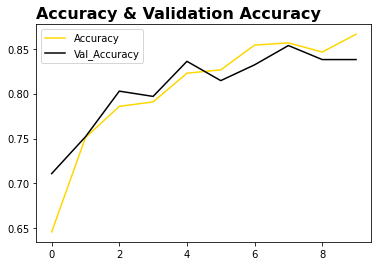

In [42]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']


plt.plot(range(0,10) , acc , color = 'gold' , label = 'Accuracy')
plt.plot(val_acc , color = 'black', label = 'Val_Accuracy')
plt.title('Accuracy & Validation Accuracy' , loc = 'left' , weight = 'bold' , fontsize = 16)
plt.legend()
plt.show()

In [43]:
preds = model3.predict_classes(test_data)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
model3.evaluate(test_data)

17/17 [==============================] - 1s 85ms/step - loss: 0.4222 - acc: 0.8379


[0.4221785068511963, 0.8379374146461487]

In [45]:
test_data.class_indices

{'Bee': 0, 'Wasp': 1}

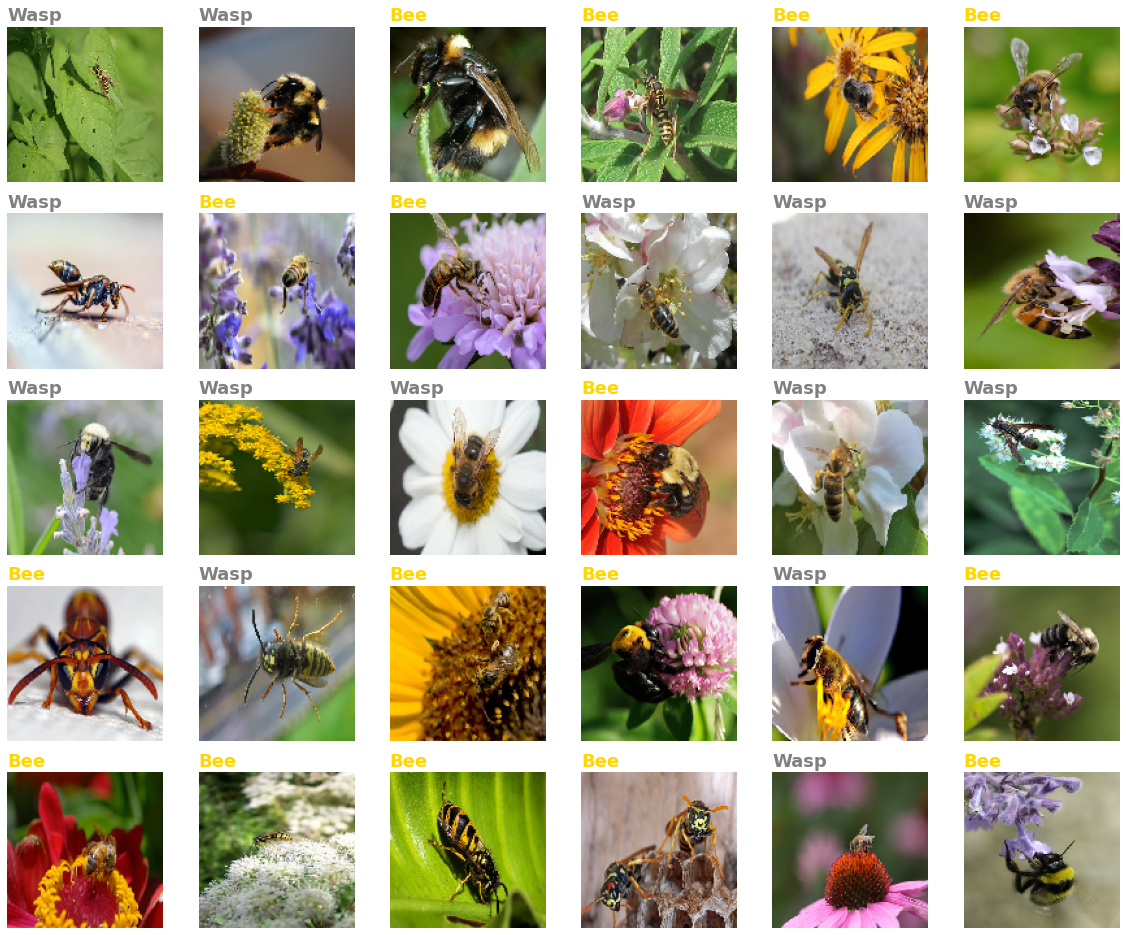

In [53]:
plt.figure(figsize=(20, 20))

for i in range(1 , 31):
    plt.subplot(6, 6, i )
    plt.imshow(test_data[0][0][i])
    if preds[i] == 0:
      plt.title('Bee' , color = 'gold' , loc = 'left', weight = 'bold' , fontsize = 18)
    if preds[i] == 1:
      plt.title('Wasp' , color = 'grey' , loc = 'left' , weight = 'bold' , fontsize = 18)

    plt.axis('off')

plt.show()


In [54]:
model3.save('beeorwasp3.h5')